# **Buid CIFAR-10 Dataset classifier Using Deep learning and Deploy it Using Streamlit**

### **1- Import Libraries**

In [1]:
import tensorflow as tf
from keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

### **2-Import some Important Functions From helper.py**

In [2]:
# Import Helper Function

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-07-27 17:08:47--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-27 17:08:47 (115 MB/s) - ‘helper_functions.py’ saved [10246/10246]



### **3-Load Dataset from Tensorflow Datasets**

In [3]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
X_train.ndim, y_train.ndim, X_test.ndim, y_test.ndim

(4, 2, 4, 2)

**AS we Have Seen Our `y_train and y_test` is 2D but for Classification, We want 1D.So we convert it into 1D Array**

In [8]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test=y_test.reshape(-1,)

In [10]:
y_train.ndim, y_test.ndim

(1, 1)

**Now We have Seen Our `y_train and y_test` is 1D Array**

### **4- Plot some Images**

In [11]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [12]:
def plot_sample_images(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

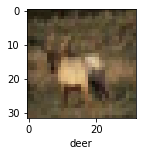

In [13]:
plot_sample_images(X_train,y_train, 3)

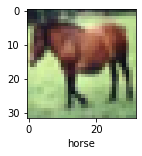

In [14]:
plot_sample_images(X_train,y_train, 7)

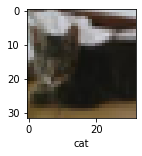

In [15]:
plot_sample_images(X_train,y_train, 9)

### **5- Normalize The Data**

In [16]:
X_train=X_train/255.0
X_test=X_test/255.0

In [17]:
X_train[:5]

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

### **6-Build CNN Model**

In [18]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [19]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 512)         1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 512)        0

### **7-Compile and Fitting The Model**

In [20]:
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [21]:
history = cnn_model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 23s 8ms/step - loss: 1.4946 - accuracy: 0.4470
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0395 - accuracy: 0.6333
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8336 - accuracy: 0.7081
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6993 - accuracy: 0.7529
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5811 - accuracy: 0.7961
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.4820 - accuracy: 0.8300
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3897 - accuracy: 0.8597
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3220 - accuracy: 0.8847
Epoch 9/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2576 - accuracy: 0.9078
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l

In [22]:
evaluation =  cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2631 - accuracy: 0.7110


### **8-Predict The Model**

In [23]:
y_pred = cnn_model.predict(X_test)
y_pred[:5]

array([[4.75410488e-04, 4.41999509e-05, 3.88847751e-04, 9.26351130e-01,
        2.17072753e-04, 7.19524994e-02, 4.02876583e-04, 2.28700719e-05,
        5.30102079e-05, 9.20553575e-05],
       [9.38355413e-07, 2.86453404e-03, 1.13301357e-09, 4.67079118e-11,
        1.82257931e-10, 7.20077990e-12, 1.11323739e-09, 3.00298984e-13,
        9.97133493e-01, 1.04363824e-06],
       [4.21676248e-01, 2.35859290e-01, 2.13839617e-02, 3.56658101e-02,
        8.80816299e-03, 4.05204901e-03, 2.55911681e-03, 7.73529988e-03,
        9.53422934e-02, 1.66917816e-01],
       [9.53714550e-01, 1.22230831e-05, 1.24507089e-04, 1.09769346e-04,
        4.20756623e-05, 3.92021275e-06, 2.14843851e-07, 7.07491722e-07,
        4.59649637e-02, 2.69128122e-05],
       [4.85299267e-08, 4.51955834e-10, 4.74112807e-04, 1.17023697e-03,
        9.97552335e-01, 6.89538911e-06, 7.96215318e-04, 1.21374299e-07,
        2.51752041e-09, 3.13499837e-10]], dtype=float32)

(None, None, None, None, None)

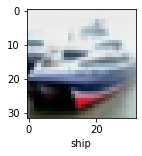

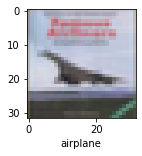

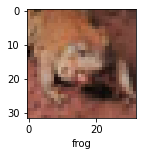

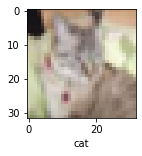

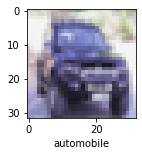

In [24]:
plot_sample_images(X_test, y_test, 1), plot_sample_images(X_test, y_test, 3), plot_sample_images(X_test, y_test, 5), plot_sample_images(X_test, y_test, 8), plot_sample_images(X_test, y_test, 9)

### **9-Saving The Model**

In [25]:
cnn_model.save('cifer_10_using_cnn.hdf5')

In [28]:
cnn_model.save('cifer_10_using_cnn.h5')

In [26]:
loaded_model =tf.keras.models.load_model("/content/cifer_10_using_cnn.hdf5")

In [27]:
loaded_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2631 - accuracy: 0.7110


[1.2631244659423828, 0.7110000252723694]